In [3]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import numpy as np

In [6]:
(x_train,y_train),(x_test,y_test)= tf.keras.datasets.mnist.load_data(path='mnist.npz')
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [7]:
print(x_train.shape,'\t',y_train.shape,'\n',x_test.shape,'\t',y_test.shape)

(60000, 28, 28) 	 (60000,) 
 (10000, 28, 28) 	 (10000,)


The Test number is:  5


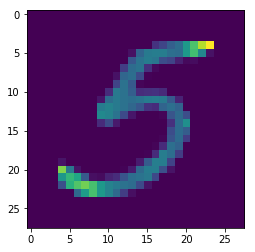

In [8]:
x = random.randint(0,9000)
plt.imshow(x_train[x])
print('The Test number is: ', y_train[x])

In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256,activation = tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(10,activation = tf.nn.softmax))
model.compile(optimizer ='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
model.fit(x_train,y_train,batch_size = 256, epochs =20)

Epoch 1/20
29696/60000 [=============>................] - ETA: 0s - loss: 0.6736 - acc: 0.8360

In [11]:
val_loss,val_accuracy = model.evaluate(x_test,y_test)
print('\n' , 'Accuracy on test set: ', val_accuracy*100)

10000/10000 [==============================] - 1s 54us/step

 Accuracy on test set:  97.52


In [ ]:
x = random.randint(0,9000)
predict = model.predict(x_test)
print('predicted number is: ', np.argmax(predict[x]))

plt.imshow(x_test[x])